In [4]:
# drop columns containing NaN, possibility to normalize, currently deactivated

for col in list(data):
    length = len(data)
    
    if not (col == 'TOTAL_CO2_MED' or col == 'new_cases_per_million_y' or col == 'DAY'):

        if type(data[col][140]) is not type(''):
            #print('do nothin')
            #print(type(data[col][140]))
            data[col]=data[col]*1#(data[col]-data[col].min())/(data[col].max()-data[col].min())
            #print('Nomalized')
        
        if int((data[col].isnull().sum()/length)*100) > 0:
            data =data.drop(col,axis=1)
            print('dropped: ', col)

dropped:  new_tests
dropped:  total_tests
dropped:  total_tests_per_thousand
dropped:  new_tests_per_thousand
dropped:  tests_per_case_x
dropped:  positive_rate_x
dropped:  tests_units
dropped:  extreme_poverty
dropped:  handwashing_facilities
dropped:  positive_rate_y
dropped:  tests_per_case_y
dropped:  GDP_y.1


<h1> Model Comparison </h1>

In [2]:
# LSTM imports

import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import time

In [3]:
# RF imports

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [17]:
# read the data
data = pd.read_csv('/home/user/Documents/#master/Sem_2/AppliedMachineIntelligence/git/group19/data/merged_data/FINALLL.csv')
data.head()

Unnamed: 0 ISO_Code  DAY        Date  TOTAL_CO2_MED  PWR_CO2_MED  \
0           0      AUT    1  2020-01-01            0.0          0.0   
1           1      AUT    2  2020-01-02            0.0          0.0   
2           2      AUT    3  2020-01-03            0.0          0.0   
3           3      AUT    4  2020-01-04            0.0          0.0   
4           4      AUT    5  2020-01-05            0.0          0.0   

   IND_CO2_MED  TRS_CO2_MED  PUB_CO2_MED  RES_CO2_MED  ...  H2_Testing policy  \
0          0.0          0.0          0.0          0.0  ...                0.0   
1          0.0          0.0          0.0          0.0  ...                0.0   
2          0.0          0.0          0.0          0.0  ...                0.0   
3          0.0          0.0          0.0          0.0  ...                0.0   
4          0.0          0.0          0.0          0.0  ...                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  StringencyIndex  GovernmentResponseIndex  \
0                        0.0              0.0                      0.0   
1                        0.0              0.0                      0.0   
2                        0.0              0.0                      0.0   
3                        0.0              0.0                      0.0   
4                        0.0              0.0                      0.0   

   ContainmentHealthIndex  EconomicSupportIndex  IndustrialProduction  \
0                     0.0                   0.0                117.27   
1                     0.0                   0.0                117.27   
2                     0.0                   0.0                117.27   
3                     0.0                   0.0                117.27   
4                     0.0                   0.0                117.27   

   unemployment_rate  
0           6.004297  
1           6.004297  
2           6.004297  
3           6.004297  
4           6.004297  

[5 rows x 100 columns]

In [18]:
for col in list(data):
    length = len(data)
    data[col].isnull().sum()
    print("NaNs in " + col + ": " + str((data[col].isnull().sum()/length)*100) +"%" )

    if not (col == 'TOTAL_CO2_MED' or col == 'new_cases_per_million' or col == 'DAY'):
        #norm all
        if type(data[col][140]) is not type(''):
            print(type(data[col][140]))
            data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())
            print('Nomalized')

        if float((data[col].isnull().sum()/length)*100) > 0:
            data =data.drop(col,axis=1)
            print('Dropped')
        else:
            print(data[col].min(),data[col].max())
    else:
        print('Not normalized, not dropped')
        print(data[col].min(),data[col].max())
    

    print('---')
#data['new_cases_per_million_y'] = np.abs(data['new_cases_per_million_y'])

NaNs in Unnamed: 0: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in ISO_Code: 0.0%
AUT SWE
---
NaNs in DAY: 0.0%
Not normalized, not dropped
1 213
---
NaNs in Date: 0.0%
2020-01-01 2020-07-31
---
NaNs in TOTAL_CO2_MED: 0.0%
Not normalized, not dropped
-0.57692471 0.0
---
NaNs in PWR_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in IND_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in TRS_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in PUB_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in RES_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in AVI_CO2_MED: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in TOTAL_CO2_LOW: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in PWR_CO2_LOW: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in IND_CO2_LOW: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
---
NaNs in TRS_CO2_LOW: 0.0%
<class 'numpy.float64'>
Nomalized
0.0 1.0
-

In [19]:
for i in range(data.shape[1]):
    print(i, data.columns[i])

0 Unnamed: 0
1 ISO_Code
2 DAY
3 Date
4 TOTAL_CO2_MED
5 PWR_CO2_MED
6 IND_CO2_MED
7 TRS_CO2_MED
8 PUB_CO2_MED
9 RES_CO2_MED
10 AVI_CO2_MED
11 TOTAL_CO2_LOW
12 PWR_CO2_LOW
13 IND_CO2_LOW
14 TRS_CO2_LOW
15 PUB_CO2_LOW
16 RES_CO2_LOW
17 AVI_CO2_LOW
18 TOTAL_CO2_HIGH
19 PWR_CO2_HIGH
20 IND_CO2_HIGH
21 TRS_CO2_HIGH
22 PUB_CO2_HIGH
23 RES_CO2_HIGH
24 AVI_CO2_HIGH
25 Additional health/documents requirements upon arrival
26 Amendments to funeral and burial regulations
27 Awareness campaigns
28 Border checks 
29 Border closure 
30 Changes in prison-related policies
31 Checkpoints within the country
32 Closure of businesses and public services
33 Curfews
34 Domestic travel restrictions
35 Economic measures
36 Emergency administrative structures activated or established
37 Full lockdown
38 General recommendations
39 Health screenings in airports and border crossings
40 Humanitarian exemptions
41 International flights suspension
42 Isolation and quarantine policies
43 Limit product imports/exports


In [27]:
#Settings

PREDICTION = 61
FEATURES = [2,*range(4,60),68,*range(75,98)]


In [28]:

for i in FEATURES:
    print(data.columns[i])

#split data in training and testing set
#we want to predict new_cases per million
X = pd.DataFrame()
y = data.iloc[:, PREDICTION]


for ft in FEATURES:

    X = pd.concat([X, data.iloc[:,ft]], axis=1)
    
    length = len(data)
    data[data.columns[ft]].isnull().sum()

X = X.reset_index()

#list of countries:
C_list = data['ISO_Code'].unique()

#num of countries:
num_countries = len(data['ISO_Code'].unique())

#do a Test/train split:
lim = int(num_countries * 0.7)

X_train = pd.DataFrame()
y_train = pd.DataFrame()

X_test = pd.DataFrame()
y_test = pd.DataFrame()

country_feats = pd.DataFrame

for c in C_list[0:lim]:
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_train = X_train.append(country_feats)
    y_train = pd.concat([y_train, country_pred])          

country_feats = pd.DataFrame
        
        
for c in C_list[lim:]:
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_test = X_test.append(country_feats)
    y_test = pd.concat([y_test, country_pred])
                  

X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)


print(X_test_arr.shape)
print(y_test_arr.shape)
print(X_train_arr.shape)
print(y_train_arr.shape)

y_train_arr = np.nan_to_num(y_train_arr)
y_test_arr = np.nan_to_num(y_test_arr)


DAY
TOTAL_CO2_MED
PWR_CO2_MED
IND_CO2_MED
TRS_CO2_MED
PUB_CO2_MED
RES_CO2_MED
AVI_CO2_MED
TOTAL_CO2_LOW
PWR_CO2_LOW
IND_CO2_LOW
TRS_CO2_LOW
PUB_CO2_LOW
RES_CO2_LOW
AVI_CO2_LOW
TOTAL_CO2_HIGH
PWR_CO2_HIGH
IND_CO2_HIGH
TRS_CO2_HIGH
PUB_CO2_HIGH
RES_CO2_HIGH
AVI_CO2_HIGH
Additional health/documents requirements upon arrival
Amendments to funeral and burial regulations
Awareness campaigns
Border checks 
Border closure 
Changes in prison-related policies
Checkpoints within the country
Closure of businesses and public services
Curfews
Domestic travel restrictions
Economic measures
Emergency administrative structures activated or established
Full lockdown
General recommendations
Health screenings in airports and border crossings
Humanitarian exemptions
International flights suspension
Isolation and quarantine policies
Limit product imports/exports
Limit public gatherings
Lockdown of refugee/idp camps or other minorities
Mass population testing
Military deployment
Other public health measures 

<h1> Random Forrest </h1>

In [29]:
# gridsearch random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
#from sklearn.ensemble import 

sc = StandardScaler()
rfr = RandomForestRegressor()
gsN = [200]#,250,500,1000]
gsK = [*range(11,13)]#np.arange(1,X_train.shape[1],2)

print(gsK)

### Validation
cval = KFold(n_splits=10, random_state=42)


pipe = Pipeline([('scaler',sc),('forest', rfr)])
model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
param_grid = {'regressor__forest__n_estimators': gsN,
              'regressor__forest__max_features': gsK}

search = GridSearchCV(model, param_grid, n_jobs=4,cv=cval,scoring='neg_mean_squared_error',return_train_score=True)
search.fit(X_train_arr, y_train_arr)

print("Best parameter RMSE=%0.3f):" % np.sqrt(-search.best_score_))

print(search.best_params_)

[11, 12]


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best parameter RMSE=18.936):
{'regressor__forest__max_features': 11, 'regressor__forest__n_estimators': 200}


<h1> LSTM </h1>

In [30]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [74]:
###########################################
### PARAMS ################################r= 0.001 | n_steps= 4 | hidden size= 25 | epochs= 50
###########################################
NumberOfSteps = [7]#[3,4,7,9,14]
LearningRates = [0.001]#[0.001, 0.0015, 0.002, 0.00075]
LSTMSizes = [25]#[25, 50, 100, 200] 
Epochs = [100]#[50, 120, 200]
Plot = False
EVAL = False
BatchSizes=[264]

n_features = len(FEATURES)

############################################
# Testing Loss
mse = tf.keras.losses.MeanSquaredError()


#############################################
### Loop de Loops beginns ###################
#############################################


low_loss = 999999999

for lr in LearningRates:
    for BS in BatchSizes:
        for n_steps in NumberOfSteps:
            for LSTM_hidden_size in LSTMSizes:
                for train_epochs in Epochs:


                    # define model
                    model = Sequential()
                    model.add(LSTM(LSTM_hidden_size, activation='relu', input_shape=(n_steps, n_features)))
                    model.add(Dense(1))
                    opt = keras.optimizers.Adam(learning_rate=lr)
                    cosine_loss = tf.keras.losses.CosineSimilarity(axis=0)
                    model.compile(optimizer=opt, loss=cosine_loss)#'mse')

                    print('**Training started with following params: lr=',lr,'| n_steps=',n_steps,'| hidden size=',LSTM_hidden_size,'| epochs=', train_epochs)
                    start = time.time()
                    for c in C_list[0:lim]:
                        country = data[data['ISO_Code']==c]
                        print('Training on: ', c)
                        # define input sequence
                        in_seq = {}
                        dataset = []

                        for idx, i in enumerate(FEATURES):
                            #print(i, country.columns[i])
                            in_seq[idx] =  np.nan_to_num(np.asarray(country.values[:, [i]]))
                            in_seq[idx] = in_seq[idx].reshape((len(in_seq[idx]), 1))


                        dataset = hstack((in_seq[0], in_seq[1]))

                        for o in range(2,len(in_seq)):
                            dataset = hstack((dataset, in_seq[o]))

                        out_seq = np.asarray(country.values[:, [PREDICTION]])
                        dataset = hstack((dataset, out_seq))

                        # convert into input/output
                        X, y = split_sequences(dataset, n_steps)


                        X = tf.convert_to_tensor(X, tf.int32)
                        # the dataset knows the number of features, e.g. 2
                        n_features = X.shape[2]
                        #print(n_features)
                        model.reset_states()
                        history = model.fit(X, y, batch_size=BS, epochs=train_epochs, verbose=0)

                        if Plot:
                            plt.figure(1)  

                             # summarize history for accuracy  

                            print(history.history.keys())  

                            plt.plot(history.history['loss'])  
                            plt.title('model loss')  
                            plt.ylabel('loss')  
                            plt.xlabel('epoch')  
                            plt.legend(['train'], loc='upper left')  
                            plt.show()  



                    end = time.time()
                    print('**Training Completed, elapsed time:',end - start,'**')
                    if EVAL:
                        print('**Testing Started**')
                        a_err = [];


                        for c in C_list[lim:]:
                            country = data[data['ISO_Code']==c]
                            print('Testing on: ', c)
                            # define input sequence
                            in_seq = {}
                            dataset = []
                            res = []
                            for idx, i in enumerate(FEATURES):
                                #print(i, country.columns[i])
                                in_seq[idx] = np.asarray(country.values[:, [i]])
                                in_seq[idx] = in_seq[idx].reshape((len(in_seq[idx]), 1))


                            dataset = hstack((in_seq[0], in_seq[1]))

                            for o in range(2,len(in_seq)):
                                dataset = hstack((dataset, in_seq[o]))

                            out_seq = np.asarray(country.values[:, [PREDICTION]])
                            dataset = hstack((dataset, out_seq))
                            #dataset = hstack((in_seq1, in_seq2, in_seq3))




                            # convert into input/output
                            X, y = split_sequences(dataset, n_steps)

                            #print(len(X))

                            for i in range(len(X)):
                                x_input = X[i].astype(np.float32)
                                x_input = x_input.reshape((1, n_steps, n_features))
                                yhat = model.predict(x_input, verbose=0)
                                #print(yhat[0])
                                res.append(max(yhat[0][0],0))



                            y = np.asarray(y).astype(np.float32)
                            res = np.asarray(res).astype(np.float32)


                            a_err.append(mse(y, res).numpy())

                            if Plot:

                                plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')
                                plt.plot(res,'b')
                                plt.plot(y,'k')
                                plt.title(c)
                                plt.ylabel(country.columns[PREDICTION])
                                plt.xlabel('Day of 2020')

                                plt.show

                        a_err = np.asarray(a_err)
                        a_err = np.mean(a_err[~np.isnan(a_err)])

                        if a_err < low_loss:
                            print('NEW BEST!!!')
                            low_loss = a_err

                        print('**Testing Completed**')
                        print('**Average Error:', a_err)

**Training started with following params: lr= 0.001 | n_steps= 7 | hidden size= 25 | epochs= 100
Training on:  AUT
Training on:  BEL
Training on:  CZE
Training on:  DEU
Training on:  DNK
Training on:  ESP
Training on:  EST
Training on:  FIN
Training on:  FRA
Training on:  GBR
Training on:  GRC
Training on:  HUN
Training on:  IRL
Training on:  ITA
**Training Completed, elapsed time: 6.763899564743042 **


<h1> Inference </h1>

In [75]:
X_test.head()

DAY  TOTAL_CO2_MED  PWR_CO2_MED  IND_CO2_MED  TRS_CO2_MED  PUB_CO2_MED  \
4260    1            0.0          1.0          1.0          1.0          1.0   
4261    2            0.0          1.0          1.0          1.0          1.0   
4262    3            0.0          1.0          1.0          1.0          1.0   
4263    4            0.0          1.0          1.0          1.0          1.0   
4264    5            0.0          1.0          1.0          1.0          1.0   

      RES_CO2_MED  AVI_CO2_MED  TOTAL_CO2_LOW  PWR_CO2_LOW  ...  \
4260          0.0          1.0            1.0          1.0  ...   
4261          0.0          1.0            1.0          1.0  ...   
4262          0.0          1.0            1.0          1.0  ...   
4263          0.0          1.0            1.0          1.0  ...   
4264          0.0          1.0            1.0          1.0  ...   

      H2_Testing policy  H3_Contact tracing  \
4260                0.0                 0.0   
4261                0.0                 0.0   
4262                0.0                 0.0   
4263                0.0                 0.0   
4264                0.0                 0.0   

      H4_Emergency investment in healthcare  H5_Investment in vaccines  \
4260                                    0.0                        0.0   
4261                                    0.0                        0.0   
4262                                    0.0                        0.0   
4263                                    0.0                        0.0   
4264                                    0.0                        0.0   

      StringencyIndex  GovernmentResponseIndex  ContainmentHealthIndex  \
4260              0.0                      0.0                     0.0   
4261              0.0                      0.0                     0.0   
4262              0.0                      0.0                     0.0   
4263              0.0                      0.0                     0.0   
4264              0.0                      0.0                     0.0   

      EconomicSupportIndex  IndustrialProduction  unemployment_rate  
4260                   0.0              0.341641           0.414528  
4261                   0.0              0.341641           0.414528  
4262                   0.0              0.341641           0.414528  
4263                   0.0              0.341641           0.414528  
4264                   0.0              0.341641           0.414528  

[5 rows x 81 columns]

(213, 81)
(213, 1)
LSTM_LOSS:  52.57871466444209
RF_LOSS:  102.81828459380988


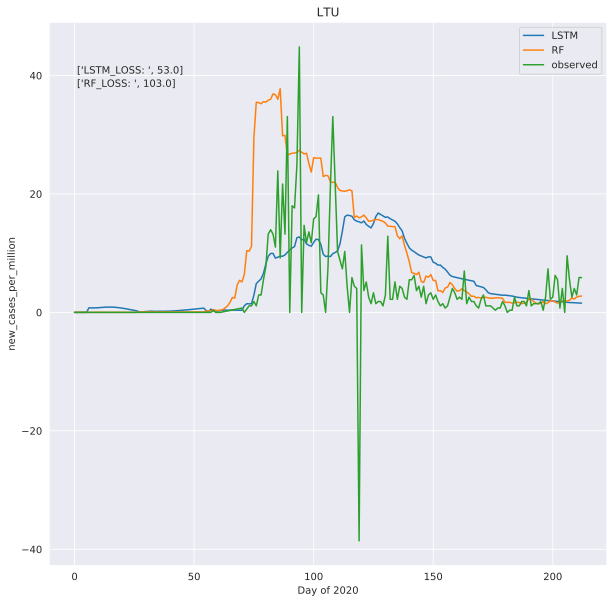

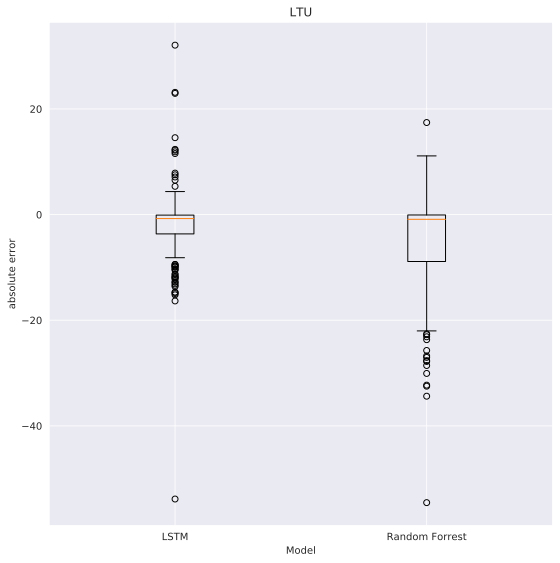

(213, 81)
(213, 1)
LSTM_LOSS:  8488.07863701725
RF_LOSS:  7473.82397475087


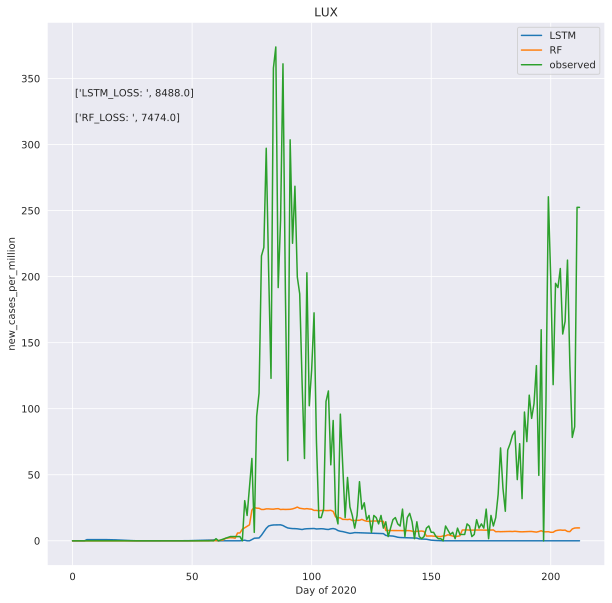

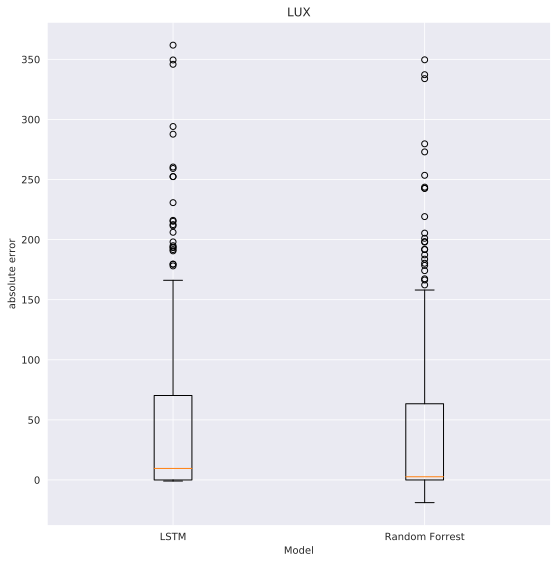

(213, 81)
(213, 1)
LSTM_LOSS:  15.72478267897155
RF_LOSS:  19.540426732704386


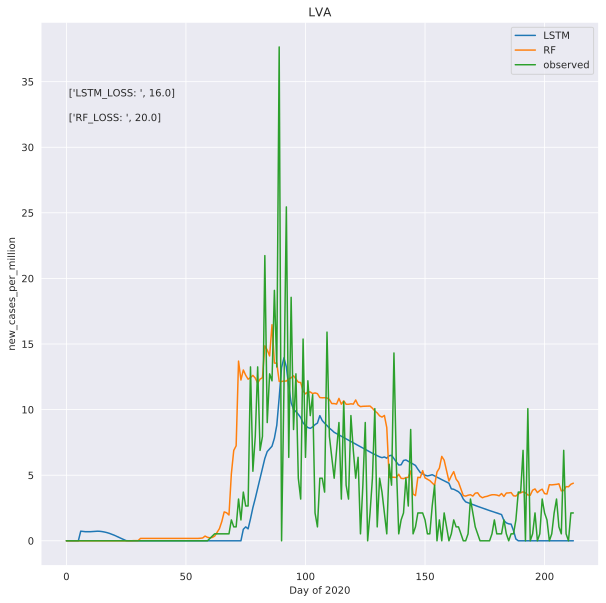

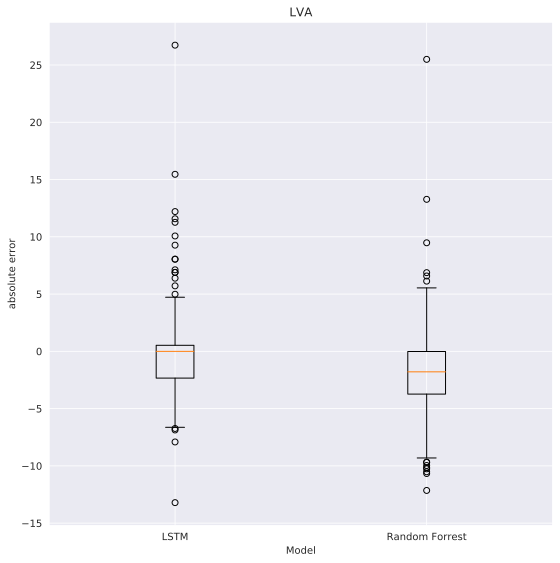

(213, 81)
(213, 1)
LSTM_LOSS:  473.4814703342844
RF_LOSS:  184.4190842496926


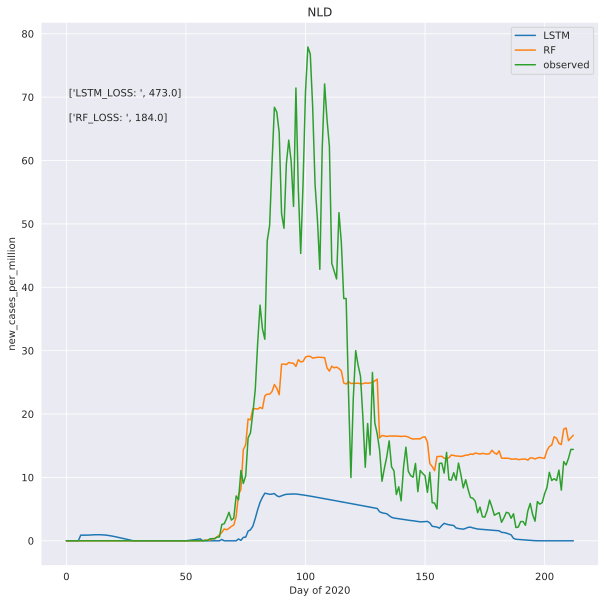

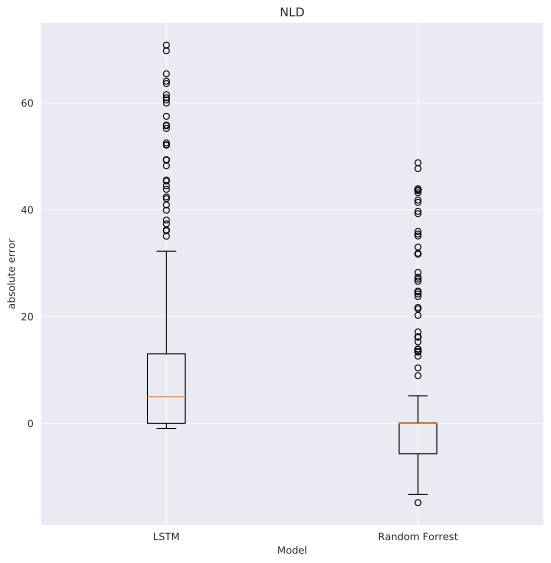

(213, 81)
(213, 1)
LSTM_LOSS:  149.42925517176946
RF_LOSS:  82.13808272295552


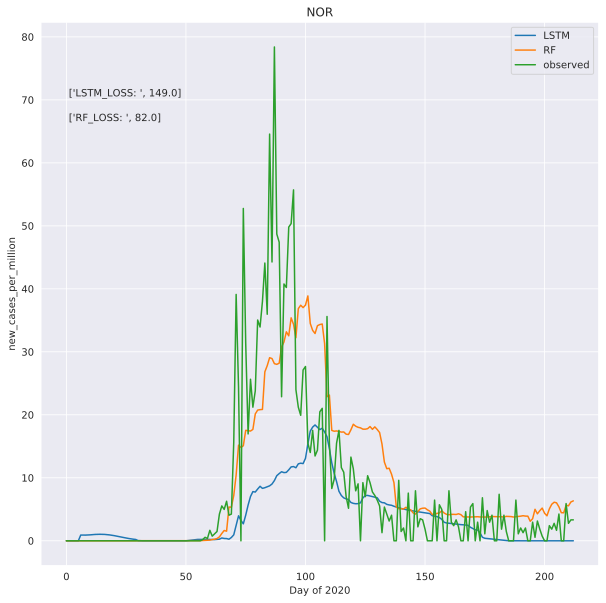

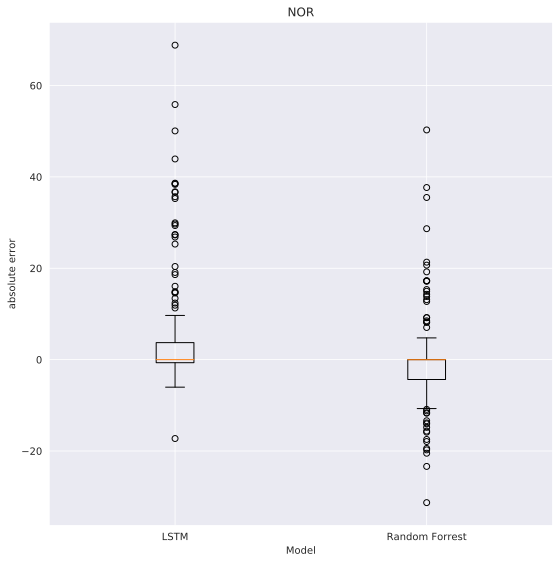

(213, 81)
(213, 1)
LSTM_LOSS:  701.4481019267517
RF_LOSS:  324.50395279680265


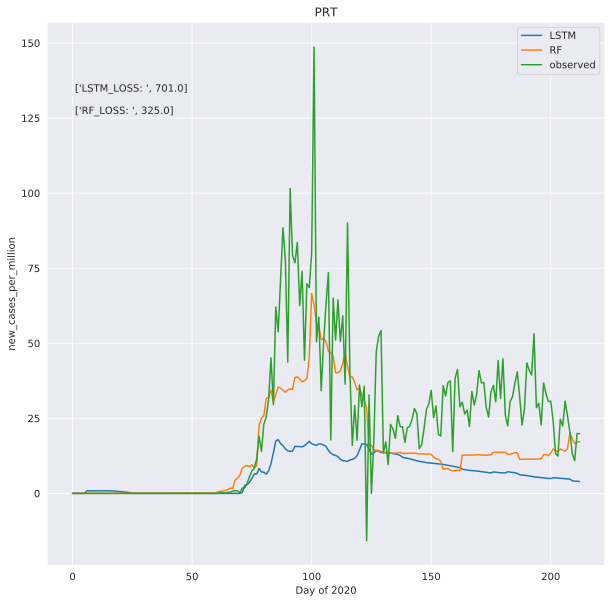

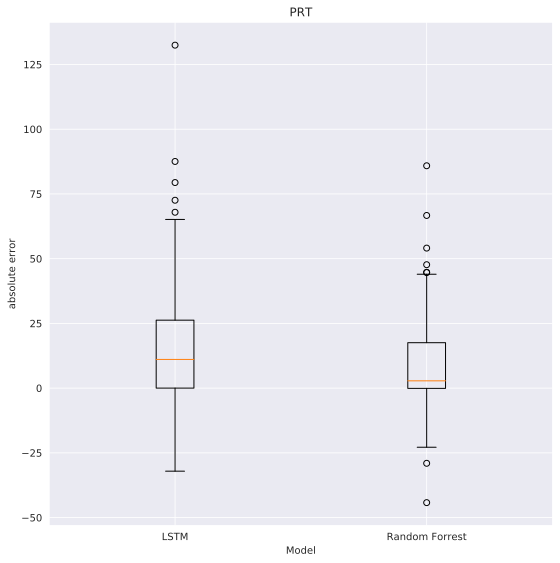

(213, 81)
(213, 1)
LSTM_LOSS:  3443.336909742082
RF_LOSS:  3018.654068474695


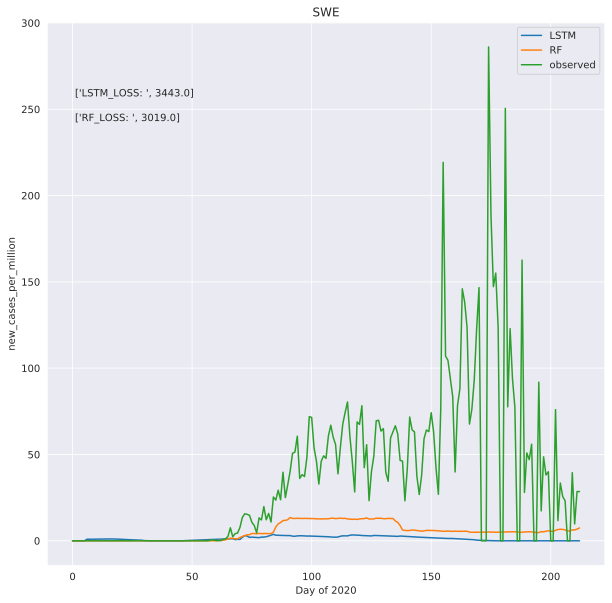

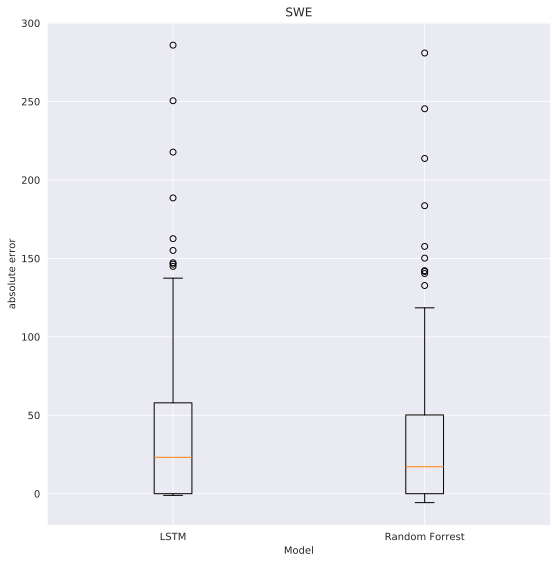

In [84]:
# TODO: ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

dlstm = []
drf = []

best_forest_estimator = search.best_estimator_

for c in C_list[lim:]:
    
    X_test = pd.DataFrame()
    y_test = pd.DataFrame()
    
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_test = X_test.append(country_feats)
    y_test = pd.concat([y_test, country_pred])
    
    X_train_arr = np.asarray(X_train)
    y_train_arr = np.asarray(y_train)

    X_test_arr = np.asarray(X_test)
    y_test_arr = np.asarray(y_test)

    print(X_test_arr.shape)
    print(y_test_arr.shape)
    y_test_arr = np.nan_to_num(y_test_arr)

    y_pred_test = best_forest_estimator.predict(X_test_arr)


    
    #country = data_normalized[data['Country']==c]


    # define input sequence
    in_seq = {}
    dataset = []
    res = list(np.zeros(NumberOfSteps[0]-1))
    for idx, i in enumerate(FEATURES):
        #print(i, country.columns[i])
        in_seq[idx] = np.asarray(country.values[:, [i]])
        in_seq[idx] = in_seq[idx].reshape((len(in_seq[idx]), 1))


    dataset = hstack((in_seq[0], in_seq[1]))

    for o in range(2,len(in_seq)):
        dataset = hstack((dataset, in_seq[o]))

    out_seq = np.asarray(country.values[:, [PREDICTION]])
    dataset = hstack((dataset, out_seq))



    # convert into input/output
    X, y = split_sequences(dataset, n_steps)

    for i in range(len(X)):
        x_input = X[i].astype(np.float32)
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        res.append(max(yhat[0][0],0))



    y = np.asarray(y).astype(np.float32)
    res = np.asarray(res).astype(np.float32)

    y_test_arr = y_test_arr.reshape(213)
    y_pred_test = y_pred_test.reshape(213) 

    print('LSTM_LOSS: ', np.mean((y_test_arr-res)**2))
    print('RF_LOSS: ', np.mean((y_test_arr-y_pred_test)**2))

    

  #  a_err = (mse(y, res).numpy())


    days = range(0,213)#np.array(X_test.DAY)
    plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')
    plt.plot(days, res)
    plt.plot(days, y_pred_test)
    plt.plot(days, y_test_arr)
    plt.title(c)
    plt.ylabel(country.columns[PREDICTION])
    plt.xlabel('Day of 2020')
    plt.title(c)
    plt.legend(["LSTM","RF", "observed"])
    
    plt.text(1, np.max(y_test_arr)*0.9, ['LSTM_LOSS: ', np.round(np.mean((y_test_arr-res)**2))])
    plt.text(1, np.max(y_test_arr)*0.85, ['RF_LOSS: ', np.round(np.mean((y_test_arr-y_pred_test)**2))])
    
    plt.show()

    fig = plt.figure(num=None, figsize=(7, 7), dpi=200, facecolor='w', edgecolor='k')
    data_to_plot_LSTM = y_test_arr-res
    data_to_plot_RF = y_test_arr-y_pred_test    
    
    
    dd = [data_to_plot_LSTM, data_to_plot_RF]
    dlstm.append(data_to_plot_LSTM)
    drf.append(data_to_plot_RF)
    
    
    ax = fig.add_axes([0, 0, 1, 1]) 
  
    # Creating plot 
    bp = ax.boxplot(dd) 
    plt.ylabel('absolute error')
    plt.xlabel('Model')
    plt.title(c)
    ax.set_xticklabels(['LSTM','Random Forrest'])
    
    # show plot 
    plt.show() 



(2, 7, 213)


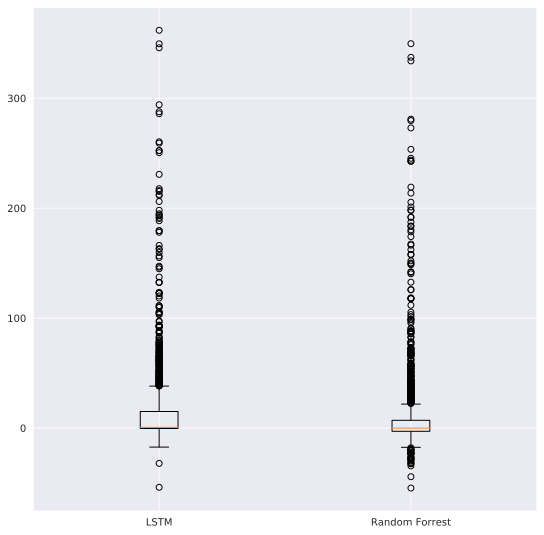

In [86]:
fig = plt.figure(figsize =(7, 7))     
dd = [dlstm, drf]
ax = fig.add_axes([0, 0, 1, 1]) 
  
print(np.asarray(dd).shape)

dd = [np.asarray(dd)[0].reshape(7*213), np.asarray(dd)[1].reshape(7*213)]
    
# Creating plot 
bp = ax.boxplot(dd) 

ax.set_xticklabels(['LSTM','Random Forrest'])
plt.y_label = "lol"


# show plot 
plt.show() 